<a href="https://colab.research.google.com/github/fullertonjohn/MDST-Tutorial/blob/main/checkpoint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 1

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@".

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [61]:
df = pd.read_csv(('/content/states_edu.csv'))

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

previewing and renaming column headers

In [62]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [63]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Reading

How many years of data are logged in our dataset? 1715

In [64]:
# @@@ 1
# Your Code
df['YEAR'].value_counts().sum()

1715

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose? ohio :(

In [65]:
# @@@ 2
michigan_data=df[df['STATE']=='MICHIGAN']
ohio_data=df[df['STATE']=='OHIO']
michigan_average=michigan_data['AVG_MATH_4_SCORE'].mean()
ohio_average=ohio_data['AVG_MATH_4_SCORE'].mean()
michigan_average, ohio_average

(234.36363636363637, 239.45454545454547)

Find the average for your chosen test across all states in 2019. 219.792

In [66]:
# @@@ 3
df_2019 = df[df['YEAR'] == 2019]
average_reading_score_2019 = df_2019['AVG_READING_4_SCORE'].dropna().mean()
average_reading_score_2019


219.79245283018867

For each state, find a maximum value for your chosen test score

In [67]:
# @@@ 4
max_scores_by_state = df.groupby('STATE')['AVG_READING_4_SCORE'].max()
max_scores_by_state



,AVG_READING_4_SCORE
STATE,
ALABAMA,220.0
ALASKA,214.0
ARIZONA,216.0
ARKANSAS,219.0
CALIFORNIA,216.0
COLORADO,227.0
CONNECTICUT,230.0
DELAWARE,226.0
DISTRICT_OF_COLUMBIA,214.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [68]:
# @@@ 5
df['EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,7.939520
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536


Feature engineering justification:

*   List item
*   List item

**<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>** Adding a column that calculates instruction expenditure per student will allow for easier analysis of the relationship between those variables across all years and states

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

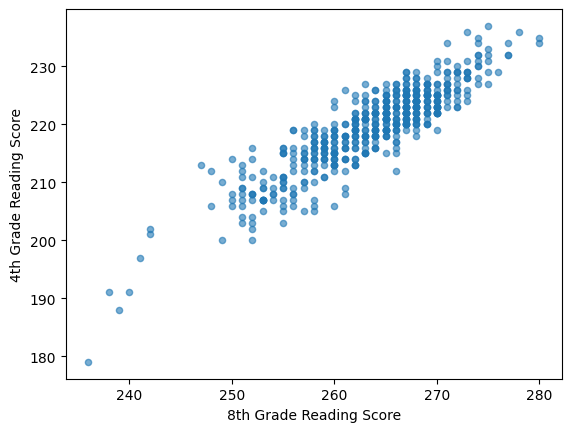

In [77]:
# @@@ 6
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('8th Grade Reading Score')
plt.ylabel('4th Grade Reading Score')

4th Grade Reading Scores vs 8th  Grade Reading Scores in a sample of 1715 years & states. There is a strong linear relationship between the two variables with no noticeable outliers

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

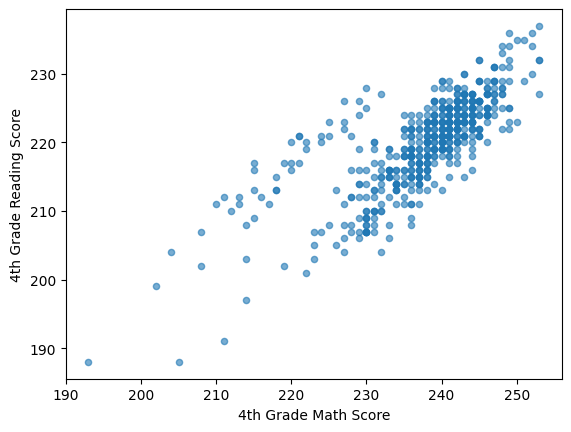

In [76]:
# @@@ 7
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('4th Grade Reading Score')

**<4th Grade Reading Scores vs 4th Grade Math Scores for a sample of 1715 years/states>** There is a strong linear relationship between the two variables with no noticeable outliers

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [72]:
from sklearn.model_selection import train_test_split

In [87]:
# @@@ 8
#Only using data from the past 10 years
X = df[df['YEAR'] >= df['YEAR'].max() - 10][['AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']
y.fillna(y.median(), inplace=True)

In [88]:
# @@@ 9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [100]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import Ridge

In [101]:
# @@@ 11
# create your model here
model = Ridge()

In [102]:
model.fit(X_train, y_train)

Ridge()

In [103]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

Very high R^2 value :) --> Predictors were good fit for the data

In [104]:
# @@@ 12
model.score(X_test, y_test)

0.8668652057874768

In [105]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

2.503251125426363

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

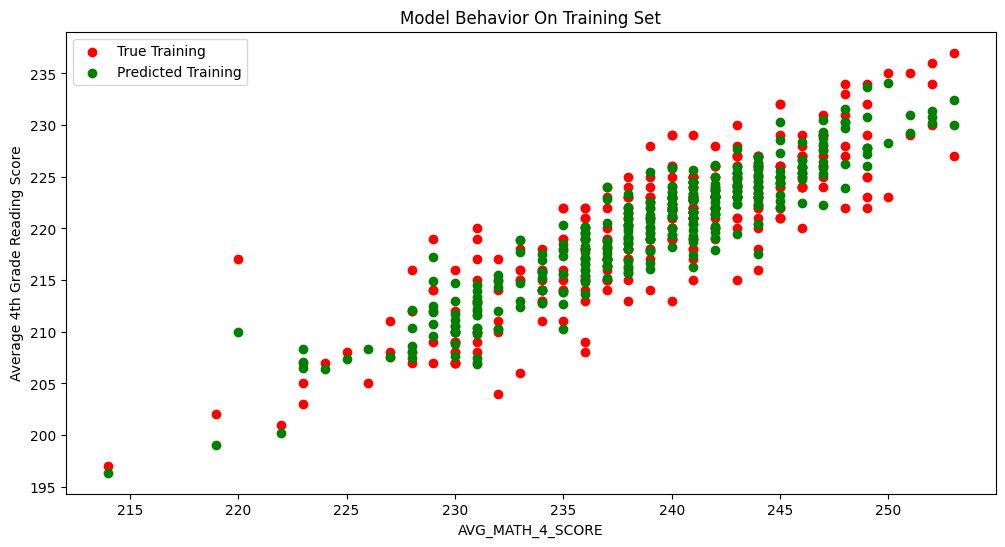

In [106]:
# @@@ 13

col_name = "AVG_MATH_4_SCORE"
f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average 4th Grade Reading Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

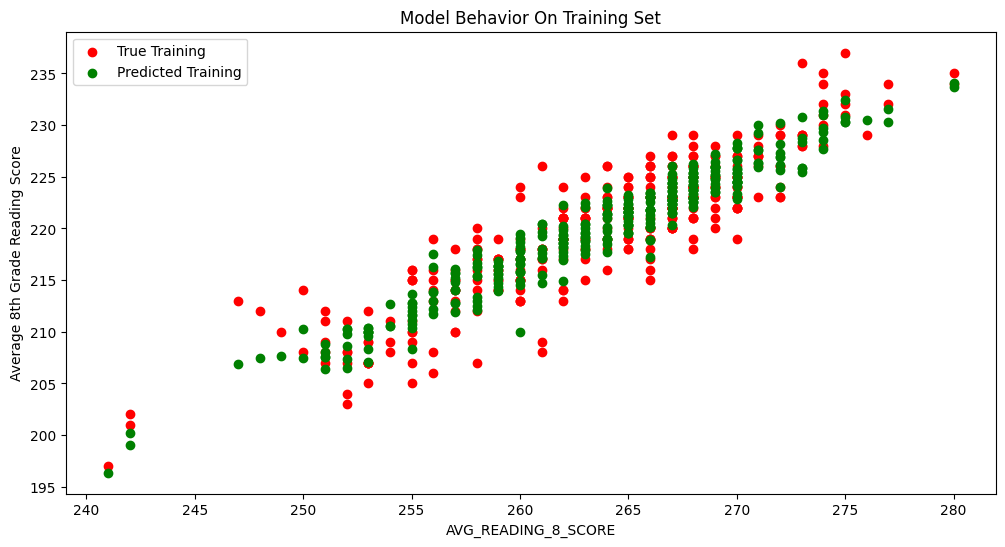

In [107]:
# @@@ 14


col_name = "AVG_READING_8_SCORE"
f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average 8th Grade Reading Score')
plt.title("Model Behavior On Training Set")